In [73]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt

eda_middle_data_path = 'eda-middle-data/'

res = pd.DataFrame([], columns=['pcode', 'max_amplitude', 'scr_count_per_minute'])
measurement = 'scr_count_per_minute'

for p_index in range(80):
    participant_key = 'P' + str(p_index + 1).zfill(2)
    file_path = eda_middle_data_path + participant_key + '_eda_result.csv'

    if not os.path.isfile(file_path):
        print(file_path + ' do not exist.')
        continue

    df = pd.read_csv(file_path)
    
    if len(df) < 5:
        print(file_path + ' has too less data, filtered out')
        continue

    Q1 = df[measurement].quantile(0.25)
    Q3 = df[measurement].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers = ((df[measurement] < (Q1 - 1.5 * IQR)) | (df[measurement] > (Q3 + 1.5 * IQR)))
    
    df_filtered = df[~outliers]

    res.loc[len(res)] = [participant_key, df_filtered['max_amplitude'].mean(), df_filtered['scr_count_per_minute'].mean()]

res

eda-middle-data/P01_eda_result.csv do not exist.
eda-middle-data/P04_eda_result.csv has too less data, filtered out
eda-middle-data/P08_eda_result.csv has too less data, filtered out
eda-middle-data/P27_eda_result.csv do not exist.
eda-middle-data/P29_eda_result.csv has too less data, filtered out
eda-middle-data/P48_eda_result.csv has too less data, filtered out
eda-middle-data/P49_eda_result.csv has too less data, filtered out
eda-middle-data/P59_eda_result.csv do not exist.
eda-middle-data/P65_eda_result.csv do not exist.
eda-middle-data/P73_eda_result.csv has too less data, filtered out
eda-middle-data/P74_eda_result.csv has too less data, filtered out
eda-middle-data/P75_eda_result.csv has too less data, filtered out
eda-middle-data/P76_eda_result.csv do not exist.


,pcode,max_amplitude,scr_count_per_minute
0,P02,0.428688,2.434815
1,P03,0.213410,1.732859
2,P05,0.372123,2.809771
3,P06,0.475930,2.360475
4,P07,0.284868,2.397431
...,...,...,...
62,P72,0.167180,2.476707
63,P77,0.302342,2.909111
64,P78,0.195330,2.553603
65,P79,2.034908,2.388313


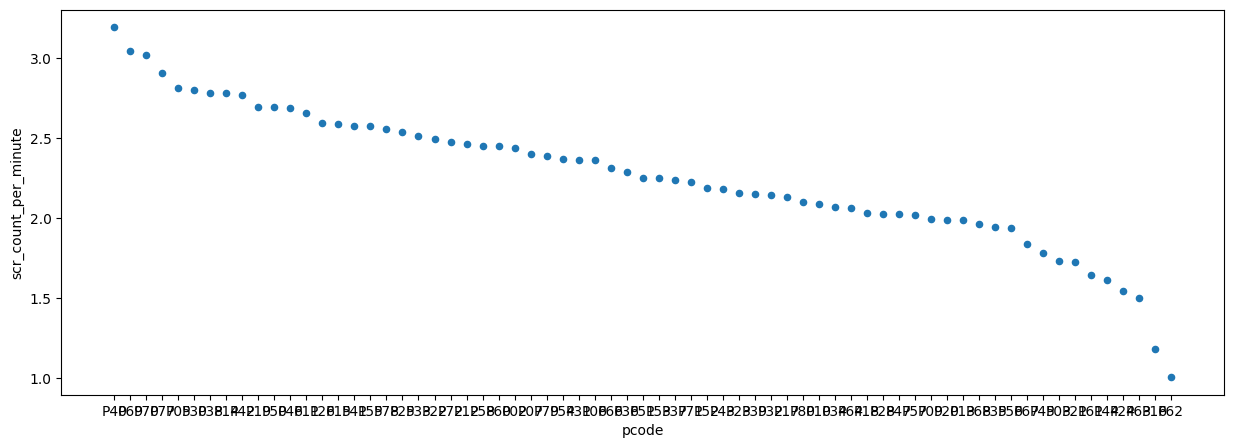

In [74]:
res.sort_values(by=measurement, ascending=False, inplace=True)
plot = res.plot(x='pcode', y=measurement, kind='scatter', figsize=(15, 5))

In [75]:
df_subj = pd.read_csv('dataset/SubjData/UserInfo.csv')
df_subj

,pcode,participationStartDate,age,gender,openness,conscientiousness,neuroticism,extraversion,agreeableness,PSS,PHQ,GHQ
0,P01,2019-05-08,27,M,11,11,3,4,13,13,0,1
1,P02,2019-05-08,21,M,14,5,12,14,5,27,6,18
2,P03,2019-05-08,24,F,10,15,8,7,11,18,2,6
3,P04,2019-05-08,23,M,12,11,8,6,11,20,1,9
4,P05,2019-05-08,27,F,10,11,13,10,6,25,14,9
...,...,...,...,...,...,...,...,...,...,...,...,...
72,P76,2019-04-30,18,M,8,8,12,6,8,21,14,21
73,P77,2019-04-30,18,M,11,12,7,11,10,7,2,7
74,P78,2019-04-30,17,M,12,11,9,12,10,10,2,7
75,P79,2019-04-30,23,M,9,10,7,12,11,13,2,6


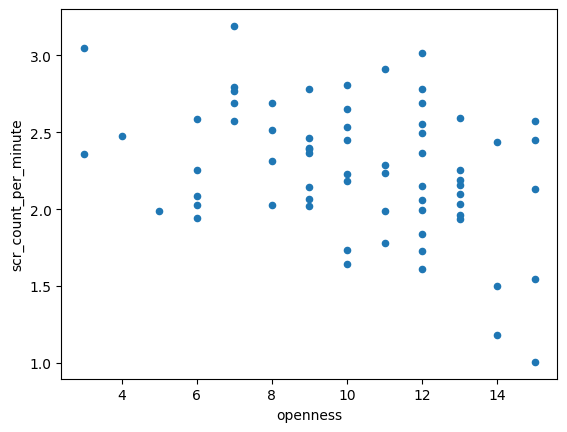

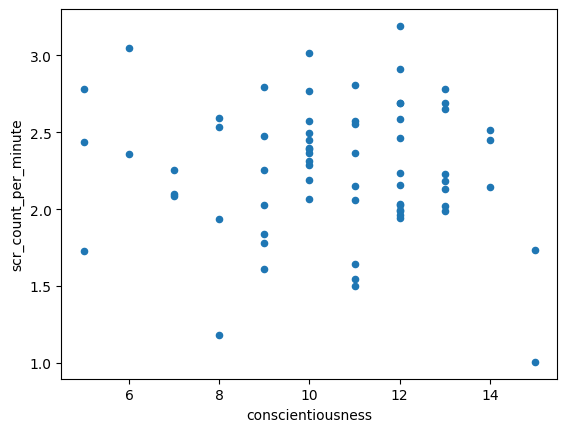

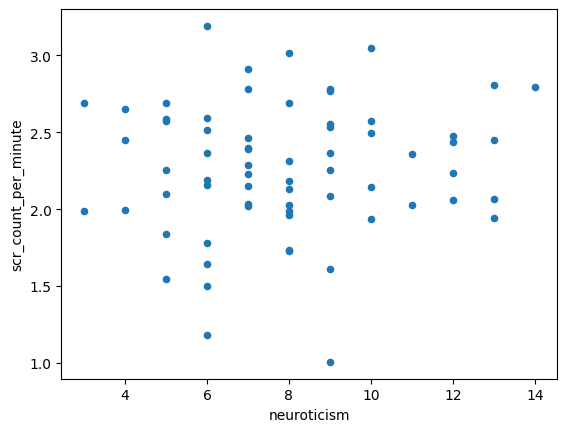

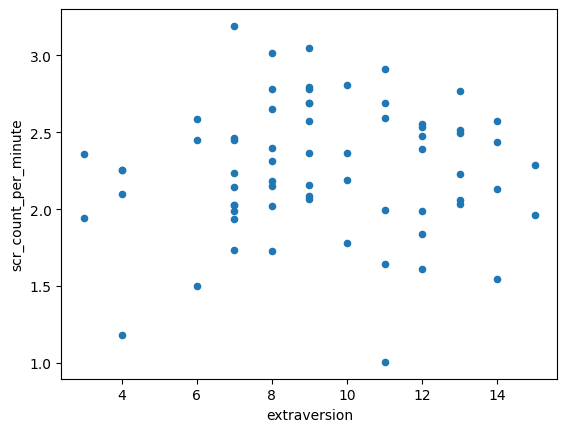

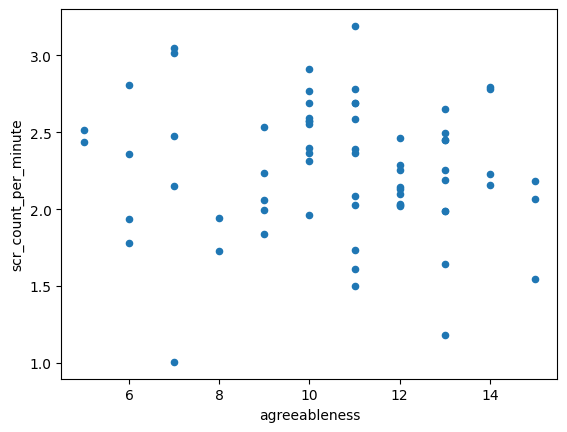

In [76]:
personality_traits = ['openness', 'conscientiousness', 'neuroticism', 'extraversion', 'agreeableness']
df_test = pd.merge(res, df_subj, on='pcode')

output_path = 'analyse_data/'
Path(output_path).mkdir(parents=True, exist_ok=True)

df_test.to_csv(f'{output_path}eda-results.csv', index=False)

for trait in personality_traits:
    df_test.plot(x=trait, y=measurement, kind='scatter')


In [82]:
import statsmodels.api as sm

X = df_test[personality_traits]
y = df_test[measurement]

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary().as_latex())


\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    & scr\_count\_per\_minute & \textbf{  R-squared:         } &     0.154   \\
\textbf{Model:}            &           OLS           & \textbf{  Adj. R-squared:    } &     0.085   \\
\textbf{Method:}           &      Least Squares      & \textbf{  F-statistic:       } &     2.229   \\
\textbf{Date:}             &     Thu, 13 Jun 2024    & \textbf{  Prob (F-statistic):} &   0.0627    \\
\textbf{Time:}             &         17:05:58        & \textbf{  Log-Likelihood:    } &   -32.013   \\
\textbf{No. Observations:} &              67         & \textbf{  AIC:               } &     76.03   \\
\textbf{Df Residuals:}     &              61         & \textbf{  BIC:               } &     89.25   \\
\textbf{Df Model:}         &               5         & \textbf{                     } &             \\
\textbf{Covariance Type:}  &        nonrobust        & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\

In [78]:
p2 = ['openness', 'conscientiousness']
X2 = df_test[p2]

X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2)
results2 = model2.fit()
print(results2.summary())

                             OLS Regression Results                             
Dep. Variable:     scr_count_per_minute   R-squared:                       0.136
Model:                              OLS   Adj. R-squared:                  0.109
Method:                   Least Squares   F-statistic:                     5.055
Date:                  Thu, 13 Jun 2024   Prob (F-statistic):            0.00915
Time:                          17:05:39   Log-Likelihood:                -32.721
No. Observations:                    67   AIC:                             71.44
Df Residuals:                        64   BIC:                             78.06
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

ShapiroResult(statistic=0.9933157356038238, pvalue=0.977437136569238)

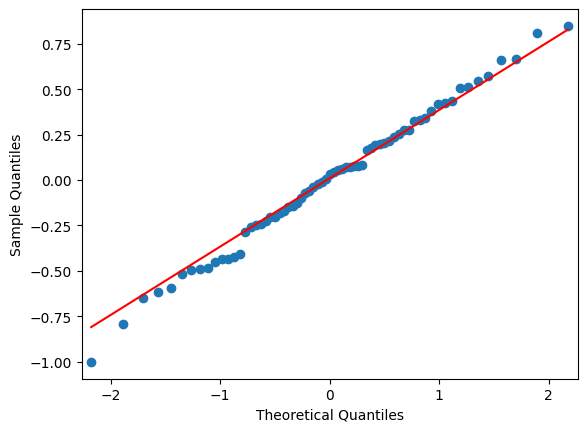

In [79]:
qq_plot = sm.qqplot(results.resid, line='q')
scipy.stats.shapiro(results.resid)

In [80]:
for trait in personality_traits:
    print(trait, scipy.stats.pearsonr(df_test[trait], df_test[measurement]))

openness PearsonRResult(statistic=-0.36624111062485726, pvalue=0.002303257772774621)
conscientiousness PearsonRResult(statistic=-0.07972955048538434, pvalue=0.5212919458234374)
neuroticism PearsonRResult(statistic=0.08886643181544975, pvalue=0.4745282039552714)
extraversion PearsonRResult(statistic=0.04983394219441611, pvalue=0.6888022950508113)
agreeableness PearsonRResult(statistic=-0.0971009984926243, pvalue=0.43439192209382743)


{'Lagrange multiplier statistic': 24.56024168899962, 'p-value': 0.21877558025456223, 'f-value': 1.3310291606928712, 'f p-value': 0.2084285762964373}


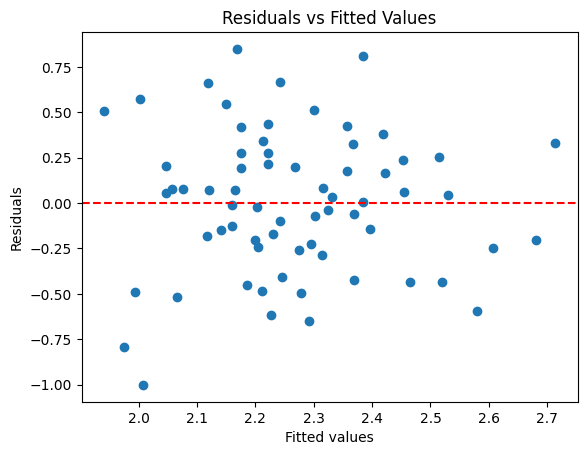

In [81]:
from statsmodels.stats.diagnostic import het_white

homogeneity_test_results = het_white(results.resid, results.model.exog)

labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
homogeneity_test_results = dict(zip(labels, homogeneity_test_results))

print(homogeneity_test_results)

plt.scatter(results.fittedvalues, results.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(0, color='red', linestyle='--')
plt.show()